# Protocol: Comparing Models by Percentage of VTs Finding a Violation, Unique States Visited, Total States Visited, and State Space Coverage

Date: 17.09.2021

## Question

Do Waypoints, Dining Philosophers, Anderson and Peterson models behave differently in terms of Percentage of VTs Finding a Violation, Unique States Visited, Total States Visited, and State Space Coverage?

## Hypothesis

In the paper, depending on the search strategies applied, the models yield to very different results concerning the listed performance indicators.

Thus, we expect clear differentiation between the models through our performance indicators and eventually a clear distinction between high- and low-connectivity models.

## Setup

- GPU: NVIDIA GeForce RTX 2080 Ti
- Program: `main` branch, commit 755ef1d
- Models: Waypoints, Philosophers, Anderson, Peterson

## Implementation

First, we compile with the CUDA_FLAGS `-DGRAPPLE_MODEL=WaypointsState`.

```
$ time ./build/grapple -s 1736331306 -n 500

real    3m39.235s
user    3m38.913s
sys     0m0.236s
```

Full output data is available at [EXP-12-model-comparison-1.csv](./data/EXP-12-model-comparison-1.csv).

---

For the second experiment, we compile with CUDA_FLAGS `-DGRAPPLE_MODEL=PhilosophersStateV2`.

We suppress violations output as there are too many ways of finding the single violation of the Dining Philosophers Problem.

```
$ time ./build/grapple -s 1736331306 -n 500 -q

real    6m27.216s
user    6m26.874s
sys     0m0.272s
```

Full output data is available at [EXP-12-model-comparison-2.csv](./data/EXP-12-model-comparison-2.csv).

---

For the third experiment, we compile with CUDA_FLAGS `-DGRAPPLE_MODEL=AndersonState`.

We suppress violations output as there are too many ways of finding violations in the model.

```
$ time ./build/grapple -s 1736331306 -n 500 -q

real    2m6.535s
user    2m6.249s
sys     0m0.204s
```

Full output data is available at [EXP-12-model-comparison-3.csv](./data/EXP-12-model-comparison-3.csv).

---

For the last experiment, we compile with CUDA_FLAGS `-DGRAPPLE_MODEL=PetersonState`.

```
$ time ./build/grapple -s 1736331306 -n 500

real    2m20.359s
user    2m20.079s
sys     0m0.208s
```

Full output data is available at [EXP-12-model-comparison-4.csv](./data/EXP-12-model-comparison-4.csv).

## Evaluation

Each model is explored using 125000 VTs.

| Model | Unique States Visited | Total States Visited |
|-------|-----------------------|----------------------|
| Waypoints | 1.21759e+09 | 35 725 590 331 |
| Dining Philosophers | 1.38213e+07 | 30 436 723 433 |
| Anderson | 1.22779e+06 | 15 477 969 183 |
| Peterson | 4.08578e+06 | 24 670 432 336 |

In [2]:
import pandas as pd

e1 = pd.read_csv("data/EXP-12-model-comparison-1.csv", skipinitialspace=True)
e2 = pd.read_csv("data/EXP-12-model-comparison-2.csv", skipinitialspace=True)
e3 = pd.read_csv("data/EXP-12-model-comparison-3.csv", skipinitialspace=True)
e4 = pd.read_csv("data/EXP-12-model-comparison-4.csv", skipinitialspace=True)

In [3]:
# Total visited
display(e1["total_visited"].sum())
display(e2["total_visited"].sum())
display(e3["total_visited"].sum())
display(e4["total_visited"].sum())

35725590331

30436723433

15477969183

24670432336

<AxesSubplot:title={'center':'Peterson, HT 18, SO 0'}, xlabel='VTs', ylabel='Total States Visited'>

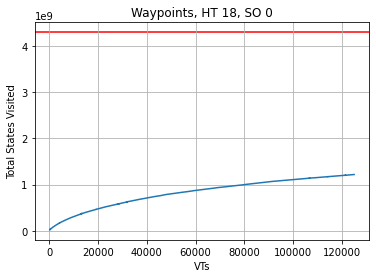

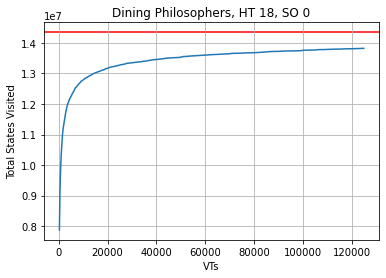

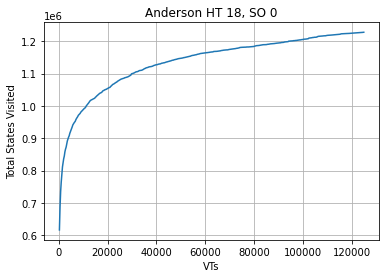

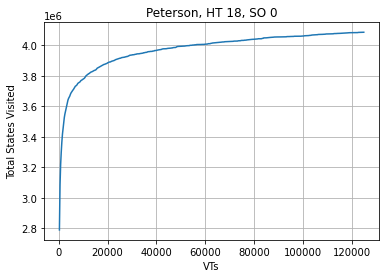

In [6]:
def plot(data, title, output_filename):
    pp = data.plot(x="vts", xlabel="VTs", y="visited", ylabel="Total States Visited", grid=True, legend=False, title=title)
    pp.get_figure().savefig(output_filename)
    return pp

pp = plot(e1, "Waypoints, HT 18, SO 0",  "output-assets/EXP-12-model-comparison-1.pdf")
pp.axhline(y=2**32, color="red", zorder=0)

pp = plot(e2, "Dining Philosophers, HT 18, SO 0", "output-assets/EXP-12-model-comparison-2.pdf")
pp.axhline(y=3**15-1, color="red", zorder=0)

plot(e3, "Anderson HT 18, SO 0", "output-assets/EXP-12-model-comparison-3.pdf")

plot(e4, "Peterson, HT 18, SO 0", "output-assets/EXP-12-model-comparison-4.pdf")

## Conclusion, Discussion